## Database Discription

### In this project, I am going to work on some emergency 911 calls recorded for Montgomery County, PA. The dataset comes from Kaggle. The dataset provides information on the location that the 911 calls come from, the description of the emergency and the time and date of the emergency call. 
### The goal of this analysis is to find the exiasting patterns in the dataset in terms of:
### 1. Where in the county the calls mostly come from?
### 2. What are the main reasons for making 911 calls?
### 3. When does the center recieve the highest volume of calls?

#### Data and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237523 entries, 0 to 237522
Data columns (total 9 columns):
lat          237523 non-null float64
lng          237523 non-null float64
desc         237523 non-null object
zip          208716 non-null float64
title        237523 non-null object
timeStamp    237523 non-null object
twp          237438 non-null object
addr         237523 non-null object
e            237523 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.3+ MB


#### The above shows there are 237523 entries for 9 columns of information.

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Question 1: Where in the county the calls mostly come from?

#### 1a. What are the top 5 zipcodes that the 911 calls come from?

In [5]:
df['zip'].value_counts().head()

19401.0    16418
19464.0    16057
19403.0    12000
19446.0    11410
19406.0     7873
Name: zip, dtype: int64

#### 1b.  What are the top 5 townships(twp) for 911 calls?

In [6]:
df['twp'].value_counts().head()

LOWER MERION    20326
ABINGTON        14572
NORRISTOWN      13749
UPPER MERION    12473
CHELTENHAM      10971
Name: twp, dtype: int64

### Question 2: What are the main reasons for making 911 calls?

#### 2a. How many unique title codes do exist?

In [10]:
df['title'].nunique()

129

####  In the titles column, the department is needed to respond is mentioned in the string before the specific reason for the call.  In this section, I am going to seperate this part and present it in a new column called Reason. 

In [7]:
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])

#### 2b. What is the most common reason for the 911 calls

In [8]:
df['Reason'].value_counts()

EMS        118532
Traffic     83437
Fire        35554
Name: Reason, dtype: int64

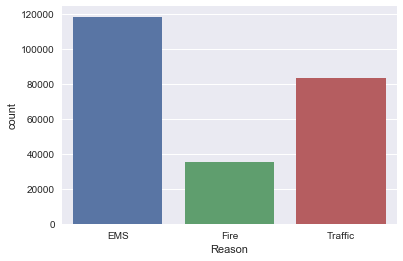

In [15]:
sns.countplot(x='Reason', data=df)

#### As the above result shows the most common reason for a 911 call is Emergency (EMS) followed by Traffic and Fire respectively.

### Question 3:  When does the center recieve the highest volume of calls?

#### The timeStamp column provides the data as an object (string type). Therefore the first step is to convert that data to Timestamp format. 

In [9]:
type(df['timeStamp'].iloc[0])

str

In [10]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [11]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

#### The data for Hour, Month, and the Day of Week the call took place was extracted from Timestamp and presented in 3 new columns.

In [12]:
df['Hour']= df['timeStamp'].apply(lambda time:time.hour)
df['Month']= df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time:time.dayofweek)

In [13]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
df['Day of Week']=df['Day of Week'].map(dmap)

#### 3a. Countplot of the 'Day of Week' with hue as reason

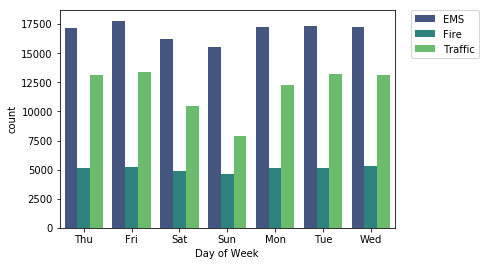

In [15]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### 3b. Countplot of the 'month' with reason as hue

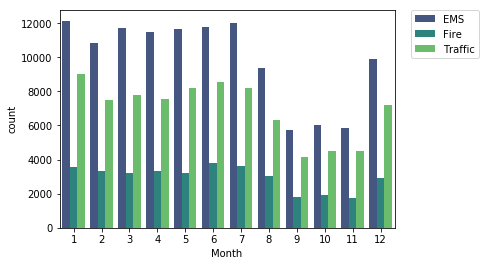

In [16]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### 3c. Number of calls per month

In [25]:
byMonth = df.groupby('Month').count()

In [26]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


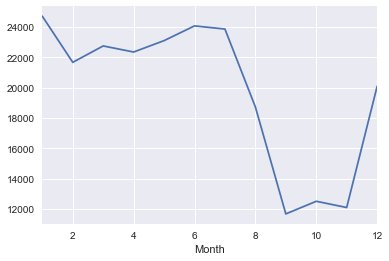

In [27]:
byMonth['lat'].plot()

#### Creating a linear fit on the number of calls each month

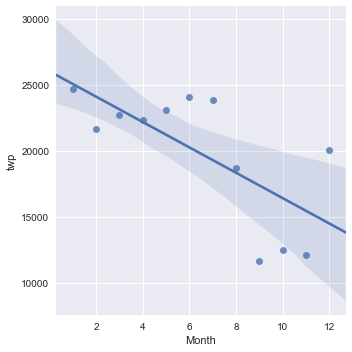

In [28]:
sns.lmplot(x='Month', y='twp', data= byMonth.reset_index())

#### There is a harsh drop for the months of September, October and November which seems to be due to the lack of data for these months. This showes itself in the margin of error around the linear fit.

#### 3d. Counts per date

In [18]:
df['Date']= df['timeStamp'].apply(lambda t:t.date())

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


#### Creating a lineplot of the data groupby date

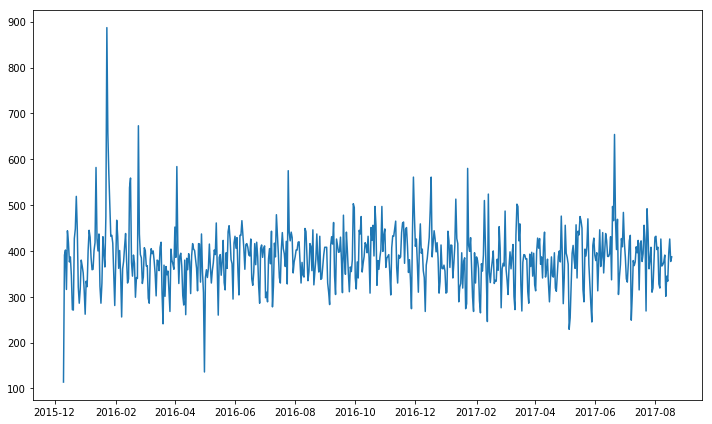

In [68]:
plt.figure(figsize=(10,6))
plt.plot(df.groupby('Date').count()['lat'])
plt.tight_layout()

#### 3f. Creating 3 seperate plots for data counts per date each presenting a reason for 911 calls.

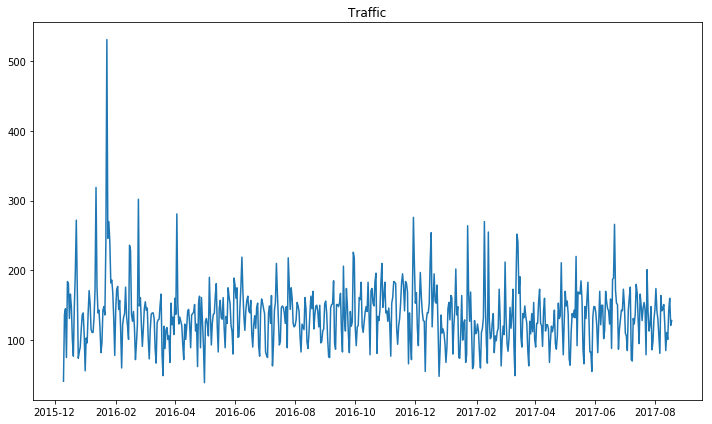

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df[df['Reason']=='Traffic'].groupby('Date').count()['lat'])
plt.title('Traffic')
plt.tight_layout()

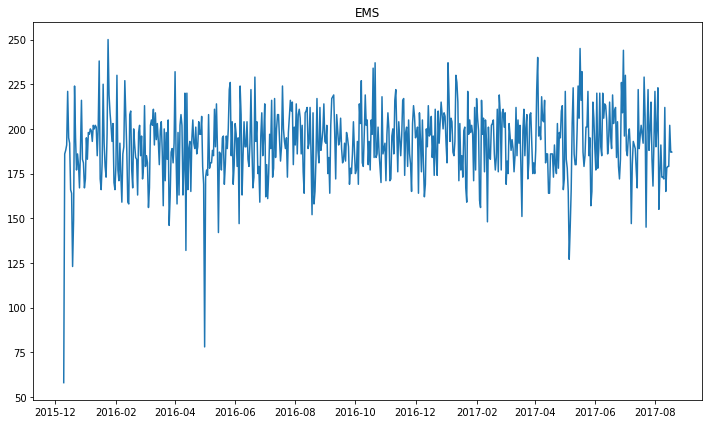

In [70]:
plt.figure(figsize=(10,6))
plt.plot(df[df['Reason']=='EMS'].groupby('Date').count()['lat'])
plt.title('EMS')
plt.tight_layout()

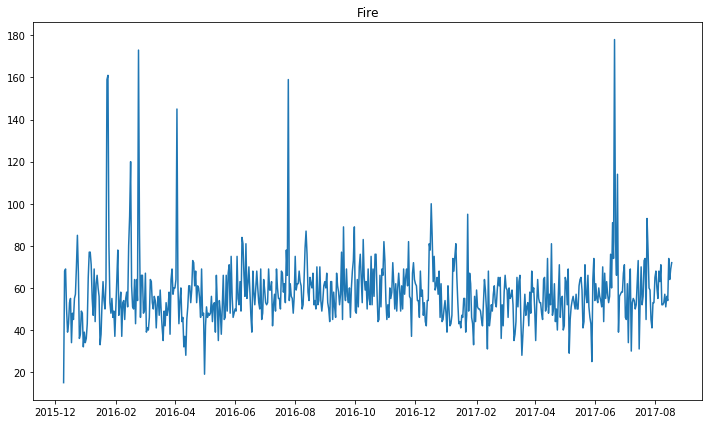

In [71]:
plt.figure(figsize=(10,6))
plt.plot(df[df['Reason']=='Fire'].groupby('Date').count()['lat'])
plt.title('Fire')
plt.tight_layout()

#### 3g. Creating a heatmap for the dataframe created by the number of calls grouped by Day of the Week and Hour.

In [72]:
dayHour = df.groupby(['Day of Week','Hour']).count()['lat'].unstack()

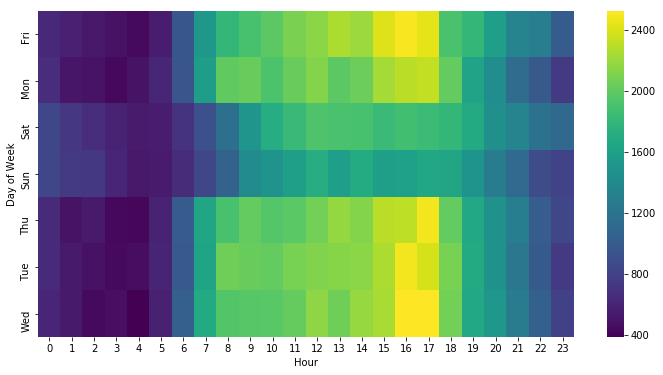

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

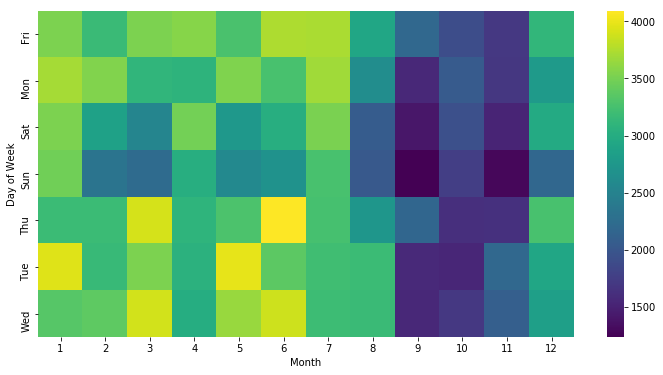

In [74]:
dayMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

#### The above heatmaps show that the number of calls during the week-days between the hours of 3:30 to 5:30 pm are higher and in March, May and June, during the last 4 days of week-days the number of calls increases.

## Conclusion:

### In this analysis I could answer the initial questions in terms of the locations that most 911 calls within the county come from, the type of the calls in relation to the nature of help was requested and the the hours, the days of the week and the months of the year that the number of calls reaches its peak. This information could help the 911 center to get prepared for the peak time. 

### More information can be extracted from the data. Forexample the details of emergency requests can help the center to manage its resources more efficiently. In addition connecting the details of requests to the location of the accident/emergency could provide an insight on the built-environment and the hazards exist in certain locations. This can help the authorities to provide a safer environment for the residents. 